In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The functions defined in this file, together with the data file 'chladni-basis.npy'
# allow you to look at your solutions to the Chladni plate problem.
#
# It works quite simply by dotting your coefficient vectors into the set of basis
# functions, defined on a 500x500 grid, then showing the result with pyplot.
#
# show_waves(x) shows the actual wave-functions
# show_nodes(x) shows the wavefunction zeros, where the sand gathers
# show_all_wavefunction_nodes(U,lambdas) shows the zeros of all the eigenfunctions defined by the columns of U

from numpy import sum, load, exp, abs, newaxis as na

basis_set = load("chladni_basis.npy")

def vector_to_function(x,basis_set):
    return sum(x[:,na,na]*basis_set[:,:,:],axis=0) 
    
def show_waves(x,basis_set=basis_set):
    fun = vector_to_function(x,basis_set)
    plt.matshow(fun,origin='lower',extent=[-1,1,-1,1])
    plt.show()

def show_nodes(x,basis_set=basis_set):
    fun   = vector_to_function(x,basis_set)
    nodes = exp(-50*fun**2)  
    plt.matshow(nodes,origin='lower',extent=[-1,1,-1,1],cmap='PuBu')
    plt.show()
    

def show_all_wavefunction_nodes(U,lams,basis_set=basis_set):
    idx = abs(lams).argsort()
    lams, U = lams[idx], U[:,idx]

    N = U.shape[0]    
    m,n = 5,3
    fig, axs = plt.subplots(m,n,figsize=(15,25))
    
    for k in range(N):
        (i,j) = (k//n, k%n)
        fun = vector_to_function(U[:,k],basis_set)
        axs[i,j].matshow(exp(-50*fun**2),origin='lower',extent=[-1,1,-1,1],cmap='PuBu')
        axs[i,j].set_xticklabels([])
        axs[i,j].set_yticklabels([])
        axs[i,j].set_title(r"$\lambda = {:.2f}$".format(lams[k]))
    plt.show()


In [3]:
# You can use the following matrices to test your eigensolver
# implementations.
#
# Change to the format for whichever language you're using
# (don't write a reader function).
# 
# For the report, you don't need to show results for all 6,
# but I suggest showing result for Aj with the largest j
# that works, and the first j (if any) that fails. This will
# show what your implementation can handle and what it can
# not. 


# A1-A3 should work with any implementation
A1   = np.array([[1,3],[3,1]]);
eigvals1 = [4,-2];

A2   = np.array([[3,1],[1,3]]);
eigvals2 = [4,2];

A3   = np.array([[1,2,3],[4,3.141592653589793,6],[7,8,2.718281828459045]])
eigvals3 = [12.298958390970709, -4.4805737703355,  -0.9585101385863923];

# A4-A5 require the method to be robust for singular matrices 
A4   = np.array([[1,2,3],[4,5,6],[7,8,9]]);
eigvals4 = [16.1168439698070429897759172023, -1.11684396980704298977591720233, 0]


A5   = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]]);
eigvals5 = [68.6420807370024007587203237318, -3.64208073700240075872032373182, 0, 0, 0];

# A6 has eigenvalue with multiplicity and is singular
A6  = np.array(
    [[1.962138439537238,0.03219117137713706,0.083862817159563,-0.155700691654753,0.0707033370776169],
       [0.03219117137713706, 0.8407278248542023, 0.689810816078236, 0.23401692081963357, -0.6655765501236198],
       [0.0838628171595628, 0.689810816078236,   1.3024568091833602, 0.2765334214968566, 0.25051808693319155], 
       [-0.1557006916547532, 0.23401692081963357, 0.2765334214968566, 1.3505754332321778, 0.3451234157557794],
       [0.07070333707761689, -0.6655765501236198, 0.25051808693319155, 0.3451234157557794, 1.5441014931930226]]);
eigvals6 = [2,2,2,1,0]


In [4]:
Kmat = np.load("Chladni-Kmat.npy")  #load data

# Problem a

## 1)

In [5]:
def gershgorin(A):
    """This function takes a matrix A and locates the eigenvalues using Gershgorin's theorem."""
    
    centers = np.zeros(len(A))  #initialize array of centers
    radii = np.zeros(len(A))  #initialize array of radii
    
    for i in range(len(A)):  #calculate Gershgorin centers and radii
        centers[i] = A[i, i]
        radii[i] = np.sum(np.abs(A[i,:])) - np.abs(A[i,i])
        
    return centers, radii

## 2)

Disk centers for K: [1.29292219e+05 1.03041439e+05 6.49675790e+04 4.36124120e+04
 3.62737520e+04 3.79900990e+04 2.41669710e+04 1.16511590e+04
 1.38650800e+04 5.60054800e+03 1.17303900e+03 1.76077100e+03
 2.88423000e+02 8.68970000e+01 1.38930000e+01] 

Disk radii for K: [4.2231647e+04 5.6927519e+04 3.1160671e+04 1.8532349e+04 7.8705160e+03
 1.7854703e+04 1.5414717e+04 2.5120410e+03 5.5029700e+03 1.1952830e+03
 3.4199000e+02 4.0121500e+02 7.1417000e+01 2.5400000e+00 2.5900000e-01]


Text(0.5, 1.0, 'Gershgorin centers and radii for matrix K')

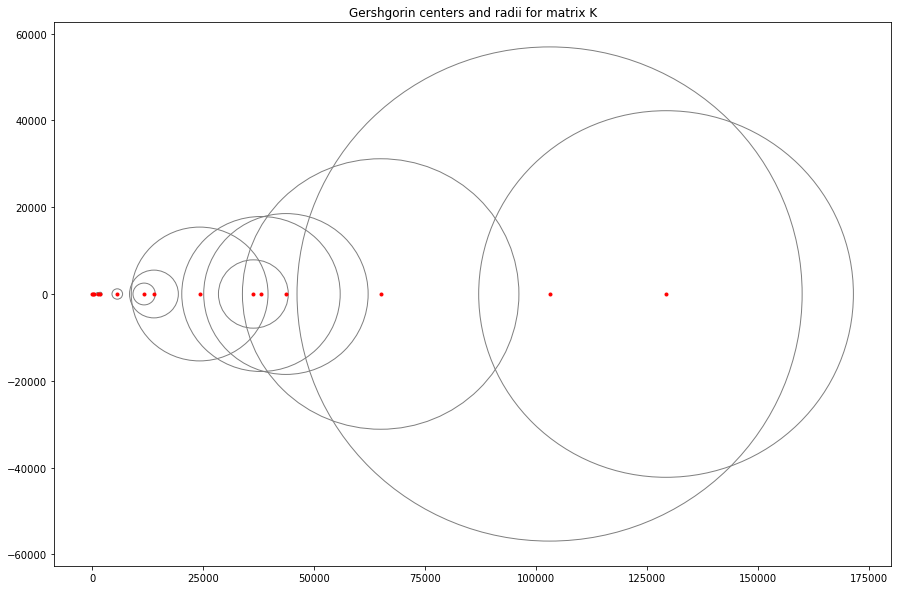

In [6]:
centers_K, radii_K = gershgorin(Kmat)  #locate Gershgorin centers and radii

print("Disk centers for K:", np.round(centers_K, 3), "\n")
print("Disk radii for K:", np.round(radii_K, 3))

#plot Gershgorin centers and radii
plt.figure(figsize=(15,10))
for i in range(len(centers_K)):
    plt.plot(centers_K[i], 0, ".", color="red")
    circle = plt.Circle((centers_K[i], 0), radii_K[i], color='grey', fill = False)
    plt.gca().add_patch(circle)
plt.title("Gershgorin centers and radii for matrix K")

# Problem b

## 1)

In [7]:
def rayleigh_qt(A, x):
    """This function takes a matrix A and and approximate eigenvector x and returns the approximate eigenvalue given by the Rayleigh quotient."""
    
    lambda_ = (np.matmul(np.matmul(np.transpose(x), A), x)) / (np.matmul(np.transpose(x), x))
    
    return lambda_

## 2)

In [8]:
def power_iterate(A, x0):
    """This function takes a matrix A and an initial vector x0 and returns the eigenvector x corresponding to the largest eigenvalue of A, the largest eigenvalue, the Rayleigh residual r and the number of iterations used k."""
    
    x = np.copy(x0)  #initialize eigenvector
    r = 1  #initialize residual
    k = 0  #initialize number of iterations
    
    while(r > 1e-9):  #perform power iteration until the Rayleigh residual is 1e-9 or smaller (convergence criterion)
        y = np.matmul(A, x)  #generate next vector
        x = y / np.max(np.abs(y))  #normalize
        
        eigenval = rayleigh_qt(A, x)  #calculate approximate eigenvalue
        r = np.linalg.norm(eigenval*x - np.matmul(A, x))  #calculate Rayleigh residual
        k += 1  #count iterations
        
    return x, eigenval, r, k

## 3)

In [9]:
def find_eigenvalue(A):
    """This function takes a matrix A and calculates the largest eigenvalue using power iteration and a random starting vector. It returns the largest eigenvalue, the Rayleigh residual r and the number of iterations used k."""
    
    x0 = np.random.rand(len(A))  #generate random starting vector
    x, eigenval, r, k = power_iterate(A, x0)  #perform power iteration
    
    return eigenval, r, k

In [10]:
# I test my power iteration function with the example matrices

print("The largest eigenvalue, residual and number of iterations:")
print("A1:", find_eigenvalue(A1))
print("A2:", find_eigenvalue(A2))
print("A3:", find_eigenvalue(A3))
print("A4:", find_eigenvalue(A4))
print("A5:", find_eigenvalue(A5))
print("A6:", find_eigenvalue(A6))

The largest eigenvalue, residual and number of iterations:
A1: (4.0, 7.903707268877759e-10, 28)
A2: (4.0, 6.482390491209025e-10, 30)
A3: (12.298958391031645, 3.8772452953388807e-10, 21)
A4: (16.116843969674136, 5.71087576412681e-10, 9)
A5: (68.64208073679549, 7.694763062569872e-10, 8)
A6: (2.0000000000000004, 6.189706497754706e-10, 30)


## 4)

The largest eigenvalue of K is 151362.666488008


<Figure size 432x288 with 0 Axes>

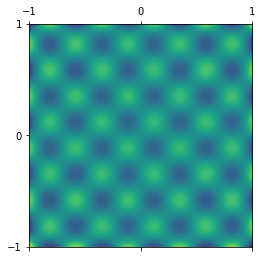

<Figure size 432x288 with 0 Axes>

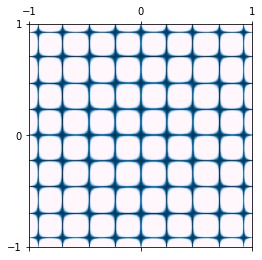

In [11]:
# I find the largest eigenvalue and corresponding eigenvector of K using power iteration

x0 = np.random.rand(len(Kmat))  #generate random starting vector
x, eigenval, r, k = power_iterate(Kmat, x0)  #perform power iteration

print("The largest eigenvalue of K is", np.round(eigenval, 9))  #print largest eigenvalue of K

plt.figure()
show_waves(x, basis_set)  #visualize wave
plt.figure()
show_nodes(x, basis_set)  #visualize nodes

# Problem c

In [12]:
# This cell contains my linear least squares solver from project 1

def householder_fast(A):
    """This function takes a m x n matrix A and uses the Householder method to compute the upper triangular n x n matrix R and stores the reflection vectors v"""
    
    R = np.copy(A)  #initialize R
    V = []  #create empty list to store reflection vectors
    
    for i in range(np.min(np.shape(A))):  #loop over columns
        e = np.zeros(np.max(np.shape(A)))  #create e_i-vector
        e[i] = 1
        
        a_i = np.copy(R[:,i])  #make a copy of the i'th column in R
        a_i[:i] = 0  #set all indices above i to zero
        
        v_i = a_i - np.copysign(np.linalg.norm(a_i) * e, -a_i[0])  #compute vector v for the i'th column
        
        V.append(v_i)  #append vector v to list V
        
        if np.dot(v_i,v_i) == 0:  #skip current column if it is already zero
            continue
        
        for j in range(i, np.min(np.shape(A))):  #apply Householder transformation to remaining columns in R
            R[:,j] -= ((2 * np.dot(v_i, R[:,j])) / np.dot(v_i, v_i)) * v_i
                      
    R = R[:np.min(np.shape(A)),:]  #remove bottom rows that are zero
    
    return V, R


def back_substitute(U,y):
    """This function takes a square upper triangular matrix U and a vector y and returns the solution vector x to the system Ux=y"""
    
    y = np.copy(y)  #initialize y
    x = np.zeros(len(U))  #initialize solution x
    singular_matrix = False  #initialize test for singular matrix

    for j in range(len(U)-1,-1,-1):  #loop backwards over columns in U
        if U[j,j] == 0:
            singular_matrix = True
            break  #stop if the matrix is singular
        
        x[j] = y[j] / U[j,j]  #calculate the j-component of the solution
        
        for i in range(j):  #loop over the j first rows in U
            y[i] = y[i] - U[i,j] * x[j]  #update y
    
    return x, singular_matrix


def qr_solve(A, b):
    """This function takes a m x n matrix A and an m vector b and returns the least squares solution n vector x_tilde to A*x_tilde=b and the residual r"""
    
    b = np.copy(b)  #initialize b
    V, R = householder_fast(A)  #compute reflection vectors and matrix R
    
    for i in range(len(V)):  #loop over reflection vectors
        
        if np.dot(V[i],V[i]) == 0:  #skip current column if it is already zero
            continue
        
        b -= ((2 * np.dot(V[i], b)) / np.dot(V[i], V[i])) * V[i]  #update right hand side by applying Householder transformation to b
    
    x_tilde, singular_matrix = back_substitute(R, b[:np.min(np.shape(A))])  #compute x_tilde using back substitution on R and the first n entries in b
    
    r = np.linalg.norm(b[np.min(np.shape(A)):np.max(np.shape(A))])  #compute residual as the norm of the remaining entries in b

    return x_tilde, r, singular_matrix

In [13]:
def rayleigh_iterate(A, x0, shift0):
    """This function takes a matrix x, and initial vector x0 and an initial shift shift0 and performs Rayleigh iteration on the matrix A. The function returns and eigenvector x, the number of iterations used k and the Rayleigh residual. The function also includes a test which returns singular_matrix = True if an unlucky starting vector x0 has been chosen resulting in a singular system in the back_substitute algorithm and causing a divide by zero."""
    
    x = np.copy(x0)  #initialize eigenvector
    shift = np.copy(shift0)  #initialize shift
    residual = 1  #initialize Rayleigh residual
    k = 0  #initialize number of iterations

    while residual > 1e-9:  #Convergence criterion: Perform Rayleigh iteration until the Rayleigh residual is 1e-9 or smaller
        y, _, singular_matrix = qr_solve((A - shift*np.identity(len(A))), x)  #generate next vector

        if singular_matrix:  #stop if a singular system has been generated (otherwise it will cause a divide by zero when normalizing)
            break
            
        shift = rayleigh_qt(A,y)  #update shift
            
        x = y / np.max(np.abs(y))  #normalize
        
        residual = np.linalg.norm(np.matmul(A, x) - shift*x)  #compute Rayleigh residual
        k += 1  #count iterations
    
    return x, k, residual, singular_matrix

## 2)

In [14]:
def find_eigenvalue_new(A, shift0):
    """This function takes a matrix A and an initial shift shift0 and performs Rayleigh iteration with a random starting vector. The function returns an eigenvector x, the corresponding eigenvalue, the number of iterations used k and the Rayleigh residual."""
    
    x0 = np.random.rand(len(A))  #generate random starting vector
    x, k, residual, singular_matrix = rayleigh_iterate(A, x0, shift0)  #perform Rayleigh iteration
    
    while singular_matrix == True:  #try with a new starting vector if the previous one resulted in a singular system
        x0 = np.random.rand(len(A))
        x, k, residual, singular_matrix = rayleigh_iterate(A, x0, shift0)
        
    eigenval = rayleigh_qt(A,x)  #compute eigenvalue
    
    return x, eigenval, k, residual

In [15]:
def find_all_eigenvals(A, unique_eigenvals, range_, min_):
    """This function finds all the unique eigenvalues of a matrix A given the number of unique eigenvalues that A has as well as a range in which to generate a random shift0 and a minimum value for the random shift0."""
    
    eigenvals = []  #initialize list of eigenvalues
    iterations = []  #initialize list of number of iterations
    residuals = []  #initialize list of Rayleigh residuals
    
    while len(eigenvals) < unique_eigenvals:  #keep looping until all unique eigenvalues have been found
        shift0 = range_ * np.random.rand() + min_  #generate random shift0 in the specified interval
        _, eigenval, k, r = find_eigenvalue_new(A, shift0)  #perform Rayleigh iteration
        already_found = False
        for i in range(len(eigenvals)):  #check if the eigenvalue has already been found
            if np.round(eigenval, 5) == np.round(eigenvals[i], 5):
                already_found = True
        if already_found == False:  #only append to lists if the eigenvalue has not been found before
            eigenvals.append(eigenval)
            iterations.append(k)
            residuals.append(r)
            
    #print results
    print("Eigenvalues:", np.round(eigenvals, 9))
    print("Number of iterations:", iterations)
    print("Rayleigh residuals:", residuals)

In [16]:
# For all the tests I have printed the eigenvalues of the matrix so that I could specify the number of unique eigenvalues and a suitable range for shift0

# Test with A1

print("The eigenvalues of A1 are:", eigvals1, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A1, 2, 10, -5)

The eigenvalues of A1 are: [4, -2] 

My Rayleigh iteration yields:
Eigenvalues: [ 4. -2.]
Number of iterations: [4, 7]
Rayleigh residuals: [0.0, 6.280369834735101e-16]


In [17]:
# Test with A2

print("The eigenvalues of A2 are:", eigvals2, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A2, 2, 10, -5)

The eigenvalues of A2 are: [4, 2] 

My Rayleigh iteration yields:
Eigenvalues: [2. 4.]
Number of iterations: [5, 8]
Rayleigh residuals: [6.661338147750939e-16, 6.280369834735101e-16]


In [18]:
# Test with A3

print("The eigenvalues of A3 are:", eigvals3, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A3, 3, 30, -10)

The eigenvalues of A3 are: [12.298958390970709, -4.4805737703355, -0.9585101385863923] 

My Rayleigh iteration yields:
Eigenvalues: [12.29895839 -0.95851014 -4.48057377]
Number of iterations: [4, 7, 4]
Rayleigh residuals: [8.501477553460164e-13, 1.6253357726084473e-11, 1.9162076325295105e-13]


In [19]:
# Test with A4

print("The eigenvalues of A4 are:", eigvals4, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A4, 3, 30, -10)

The eigenvalues of A4 are: [16.116843969807043, -1.116843969807043, 0] 

My Rayleigh iteration yields:
Eigenvalues: [16.11684397  0.         -1.11684397]
Number of iterations: [5, 6, 5]
Rayleigh residuals: [4.440892098500626e-15, 8.773019629431345e-16, 1.4142412266816947e-15]


In [20]:
# Test with A5

print("The eigenvalues of A5 are:", eigvals5, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A5, 3, 100, -10)

The eigenvalues of A5 are: [68.6420807370024, -3.642080737002401, 0, 0, 0] 

My Rayleigh iteration yields:
Eigenvalues: [-0.         68.64208074 -3.64208074]
Number of iterations: [4, 5, 4]
Rayleigh residuals: [3.9556785759388337e-13, 1.2304294395662024e-12, 1.2159620567149538e-12]


In [21]:
# Test with A6

print("The eigenvalues of A6 are:", eigvals6, "\n")

print("My Rayleigh iteration yields:")
find_all_eigenvals(A6, 3, 10, -5)

The eigenvalues of A6 are: [2, 2, 2, 1, 0] 

My Rayleigh iteration yields:
Eigenvalues: [2. 0. 1.]
Number of iterations: [3, 6, 6]
Rayleigh residuals: [2.5941895113997935e-13, 5.916076915212329e-16, 2.6912265413954374e-16]


# Problem d

## 2)

In [22]:
# I try finding the eigenvalues of K using just the Gershgorin centers as shift0

eigenvecs = []  #initialize list of eigenvectors
eigenvals = []  #initialize list of eigenvalues

for i in range(len(centers_K)):  #perform Rayleigh iteration for each of the Gershgorin centers
    x, eigenval, k, r = find_eigenvalue_new(Kmat, centers_K[i])
    eigenvecs.append(x)
    eigenvals.append(eigenval)
    
print("Eigenvalues found by naive method:", eigenvals, "\n")  #print eigenvalues found

print("As suspected, I havn't found all eigenvalues because there are multiples of the same ones.")

Eigenvalues found by naive method: [52766.288757713846, 93999.61412883647, 36152.369974537396, 52766.288757713846, 36152.36997453739, 36152.36997453739, 22590.19851959991, 11485.212833611102, 13338.622299303437, 5560.88119751892, 1132.216568065963, 1799.8058902160717, 286.5333065144928, 86.88021641810677, 13.892607255232187] 

As suspected, I havn't found all eigenvalues because there are multiples of the same ones.


In [23]:
unique_eigenvals = len(Kmat)  #K should have 15 unique eigenvalues
eigenvecs = []  #initialize list for eigenvectors
eigenvals = []  #initialize list for eigenvalues

# First I find as many eigenvalues as possible by just using the Gershgorin centers

for i in range(len(centers_K)):  #perform Rayleigh iteration for each of the Gershgorin centers
    x, eigenval, k, r = find_eigenvalue_new(Kmat, centers_K[i])
    already_found = False
    for i in range(len(eigenvals)):  #check if the eigenvalue has already been found
        if np.round(eigenval, 3) == np.round(eigenvals[i], 3):
            already_found = True
    if already_found == False:  #only append to lists if the eigenvalue is new
        eigenvecs.append(x)
        eigenvals.append(eigenval)


# Then I find the remaining eigenvalues
        
while len(eigenvals) < unique_eigenvals:  #loop until all eigenvalues have been found
    shift0 = (np.max(centers_K) - np.min(centers_K)) * np.random.rand() + np.min(centers_K)  #generate a random shift between the minimum and maximum value of Gershgorin center
    x, eigenval, k, r = find_eigenvalue_new(Kmat, shift0)  #perform Rayleigh iteration
    already_found = False
    for i in range(len(eigenvals)):  #chech if the eigenvalue has already been found
        if np.round(eigenval, 3) == np.round(eigenvals[i], 3):
            already_found = True
    if already_found == False:  #only append to lists if the eigenvalue is new
        eigenvecs.append(x)
        eigenvals.append(eigenval)

Eigenvalues: [151362.6664880077, 52766.288757713824, 36152.369974537396, 22590.198519599915, 11485.212833611102, 13338.622299303437, 5560.88119751892, 1132.216568065963, 1799.8058902160717, 286.5333065144926, 86.88021641810677, 13.892607255232187, 32779.07108357952, 50430.02765418719, 93999.61412883646]


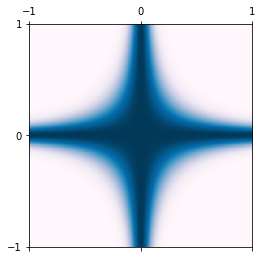

In [24]:
print("Eigenvalues:", eigenvals)  #print the eigenvalues found

lowest_eigenval = np.min(eigenvals)  #find lowest eigenvalue
ind_lowest = eigenvals.index(lowest_eigenval)  #locate index of lowest eigenvalue in list
x_lowest_eigenval = eigenvecs[ind_lowest]  #find eigenvector corresponding to the lowest eigenvalue

show_nodes(x_lowest_eigenval, basis_set)  #visualize nodes corresponding to lowest eigenvalue

## 3)

In [25]:
sorted_index = np.argsort(eigenvals)  #find the indices in the list of the eigenvalues in order of ascending eigenvalue
T = np.zeros(np.shape(eigenvecs))  #initialize transformation matrix

#sort eigenvectors so that the columns of T correspond to the eigenvectors in order of ascending eigenvalue
for i in range(len(eigenvecs)):
    for j in range(len(sorted_index)):
        if sorted_index[j] == i:
            T[:,j] = eigenvecs[i]

lambdas = np.sort(eigenvals)  #sort eigenvalues in order of ascending eigenvalue
Lambda = lambdas * np.identity(len(eigenvals))  #create Lambda matrix with eigenvalues on main diagonal


K_constructed = np.matmul(np.matmul(T, Lambda), np.linalg.inv(T))  #calculate K from T and lambda (K = T * Lambda * inv(T))

print("K_constructed =", np.round(K_constructed, 9), "\n")  #print constructed K
print("K_constructed - K =", np.round(K_constructed - Kmat, 9))  #subtract actual K matrix from constructed K matrix (they should be equal)

K_constructed = [[ 1.29292219e+05 -3.23181838e+04 -4.92650364e+03 -1.67917650e+03
  -8.15234825e+02  9.77004503e+02 -8.83676164e+02  2.28210230e+02
  -2.95326870e+02  4.50195842e+01 -4.83270448e+01  9.84899004e+00
   9.56999957e-01  2.85047133e+00 -1.32709364e+00]
 [-3.18691142e+04  1.03041439e+05 -1.94240789e+04  3.56884436e+03
   2.19155398e+02 -4.50289671e+02 -3.11468673e+01  7.02928748e+02
  -4.57552975e+02  6.90732938e+01 -1.05358245e+02  2.15191647e+01
   2.11868999e+00  6.28075503e+00 -5.76102720e-02]
 [-5.91014326e+03 -1.94543048e+04  6.49675787e+04  2.36870185e+02
   2.58691308e+03 -7.78492549e+02  6.09428293e+02  8.34015676e+02
  -4.54301833e+02  1.03894845e+02 -1.48613071e+02  3.11317924e+01
   2.96795293e+00  8.84937187e+00 -7.44172429e-01]
 [ 4.07610509e+02  2.74636383e+03 -3.74016006e+02  4.36124119e+04
   8.41004633e+02  7.59415378e+03 -4.74217725e+03  6.38331815e+02
   6.42623947e+02 -5.04817047e+01  3.67956806e+02 -9.07944328e+01
  -7.28566075e+00 -2.22311821e+01 -7.31

## 4)

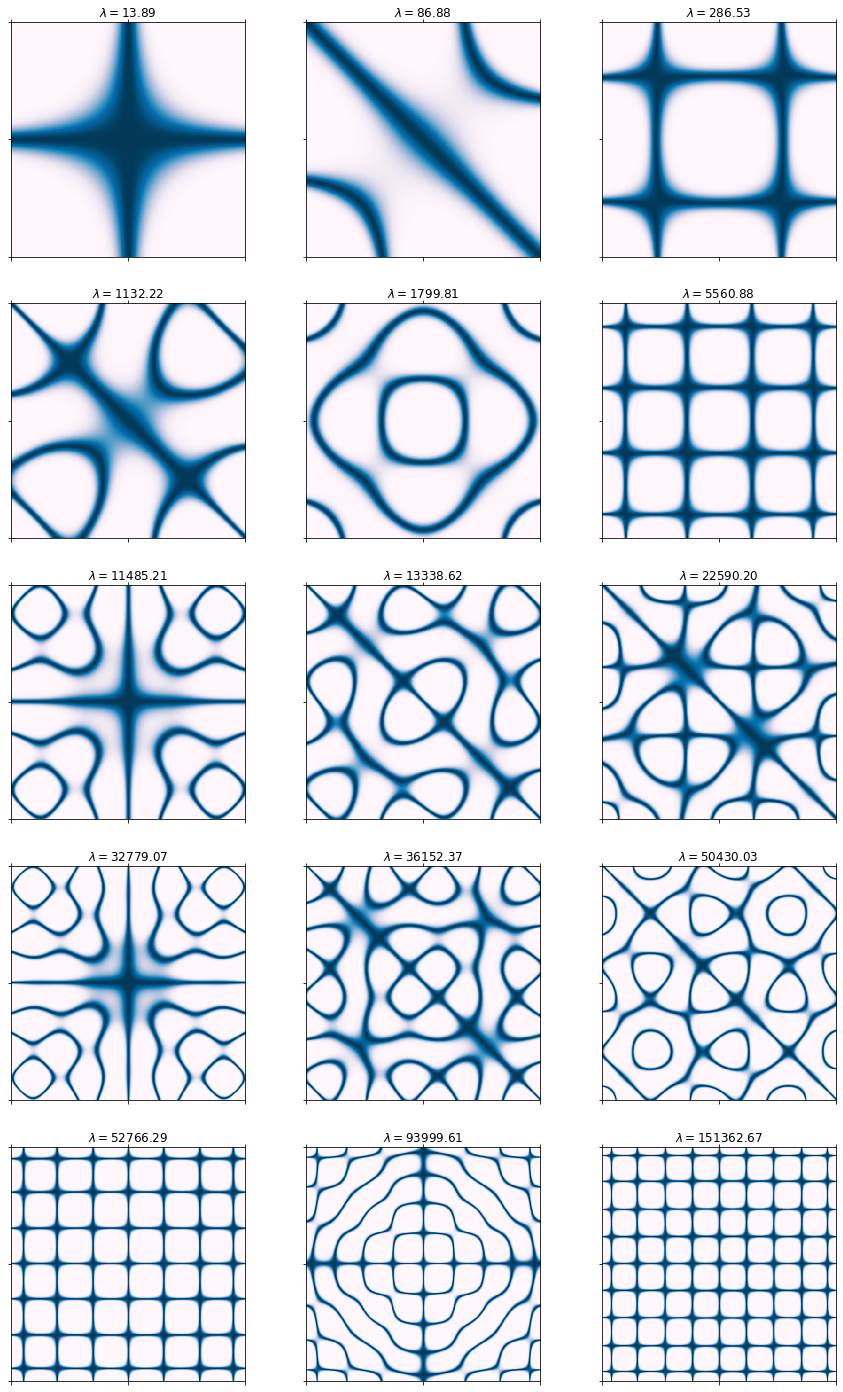

In [26]:
show_all_wavefunction_nodes(T, lambdas, basis_set)  #visualize full solution